# California Housing Price Prediction
___

## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:\learn\ML projects\datasets\housing.csv")

## Understanding Data

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dict(df['ocean_proximity'].value_counts())

{'<1H OCEAN': 9136,
 'INLAND': 6551,
 'NEAR OCEAN': 2658,
 'NEAR BAY': 2290,
 'ISLAND': 5}

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning and perparing

#### Check Nulls Values

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.drop(['index'],axis=1,inplace=True)

#### Check Outliers Values

In [12]:
import numpy as np

In [13]:
columns = list(df.columns)

In [14]:
def outlierHandling(cols) : 
    for col in cols : 
        if col == 'ocean_proximity' :
            continue
        else :
            q75, q25 = np.percentile(df.loc[:,col],[75,25])
            interquartile = q75 - q25
            maxNumber = q75+(0.2*interquartile)
            minNumber = q25-(0.85*interquartile)
            df.loc[df[col] > maxNumber,col] = np.nan
            df.loc[df[col] < minNumber,col] = np.nan
    cleanData = df.dropna(axis=0)
    cleanData.reset_index(inplace=True)
    return cleanData

In [15]:
cleanData = outlierHandling(columns)

<Axes: >

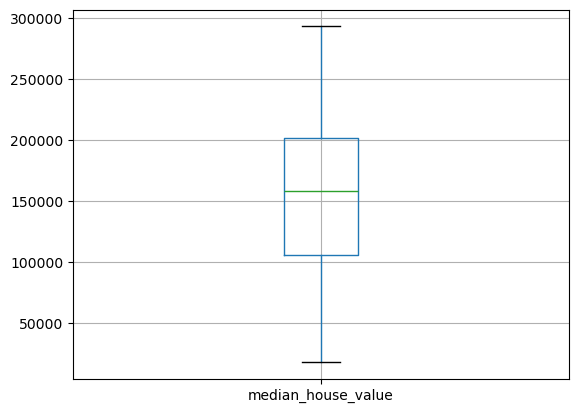

In [16]:
cleanData.boxplot('median_house_value')

In [17]:
cleanData.describe()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000
mean,9703.960882,-119.467575,35.507239,27.546826,1723.280789,368.788497,1049.525112,348.070114,3.237761,157104.060998
std,6047.679491,1.686373,1.718505,9.125643,727.454055,148.084476,416.123769,137.587125,1.045913,61799.904971
min,20.000000,-123.080000,32.750000,2.000000,18.000000,3.000000,8.000000,5.000000,0.716000,17500.000000
25%,4444.000000,-121.030000,33.970000,20.000000,1209.000000,266.000000,747.000000,253.000000,2.430600,105400.000000
50%,8689.000000,-118.620000,34.440000,30.000000,1685.000000,362.000000,1051.000000,344.000000,3.233300,158300.000000
75%,16113.000000,-118.080000,37.350000,35.000000,2229.000000,473.000000,1357.000000,445.000000,4.073500,201500.000000
max,20319.000000,-117.260000,38.470000,40.000000,3480.000000,717.000000,1909.000000,668.000000,5.179500,293500.000000


In [18]:
cleanData.shape

(6033, 11)

In [19]:
cleanData.isna().sum() 

index                 0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Label Encoding For Categorical Values

In [20]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [21]:
cleanData['ocean_proximity'] = labelEncoder.fit_transform(cleanData['ocean_proximity'])

C:\Users\moham\AppData\Local\Temp\ipykernel_16724\664136423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData['ocean_proximity'] = labelEncoder.fit_transform(cleanData['ocean_proximity'])


In [22]:
dict(cleanData['ocean_proximity'].value_counts())

{0: 2850, 1: 2238, 3: 517, 4: 427, 2: 1}

In [23]:
cleanData.drop(['index'],axis=1,inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16724\1930935754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData.drop(['index'],axis=1,inplace=True)


In [24]:
cleanData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,3
1,-122.26,37.82,40.0,624.0,195.0,423.0,160.0,0.9506,187500.0,3
2,-122.27,37.82,40.0,946.0,375.0,700.0,352.0,1.7750,112500.0,3
3,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,3
4,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,3


## Data Visualization

In [25]:
import seaborn as sns 
from matplotlib import pyplot as plt 

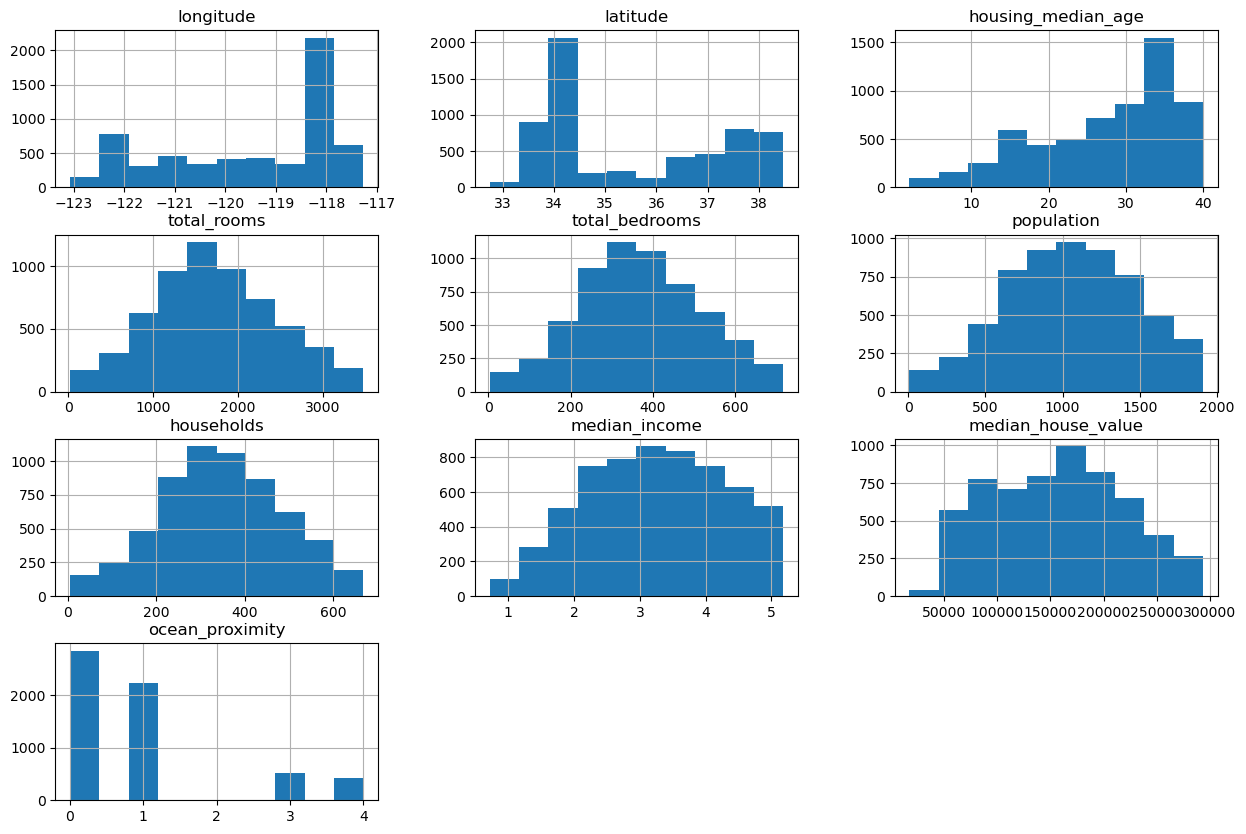

In [26]:
cleanData.hist(figsize=(15,10))
plt.show()

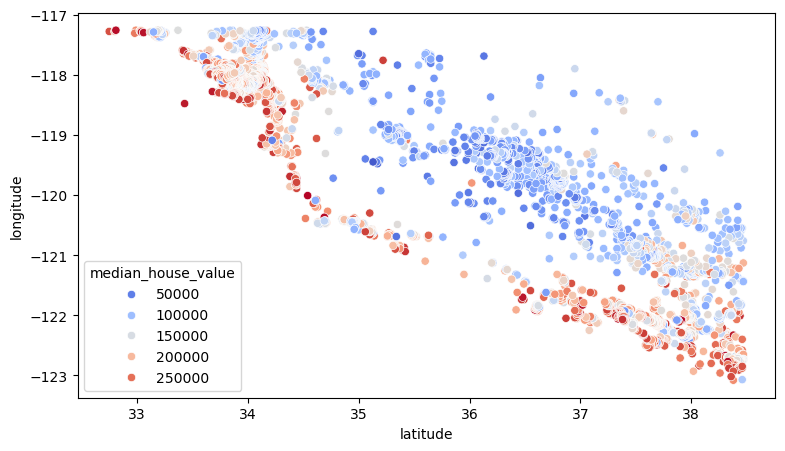

In [27]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = 'latitude' , y = 'longitude' , data = cleanData , hue = 'median_house_value' , palette = 'coolwarm')
plt.show()

<Figure size 1000x500 with 0 Axes>

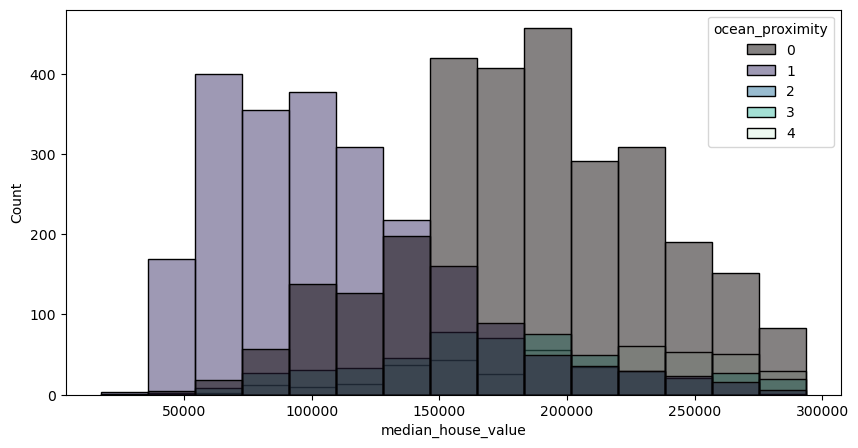

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(x=cleanData['median_house_value'], bins=15, hue=cleanData['ocean_proximity'], palette='mako')
plt.show()

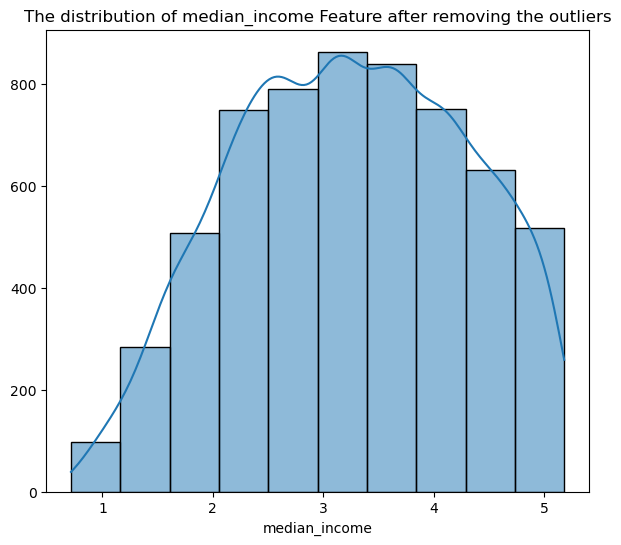

In [48]:
plt.figure(figsize=(7,6))
sns.histplot(x=cleanData['median_income'], bins=10, kde=True)
plt.title("The distribution of median_income Feature after removing the outliers")
plt.ylabel("")
plt.show()

## Feature Engineering

#### Feature Selection 

In [29]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [30]:
featureData = cleanData.drop(['median_house_value'],axis=1)
targetData = cleanData['median_house_value']

In [31]:
def SelectFeatureByPercentile(x,y,percentile) :
    SelectionFeature = SelectPercentile(score_func=f_classif,percentile=percentile)
    SelectedData = SelectionFeature.fit_transform(x,y)
    finalData = pd.DataFrame(SelectedData, columns=[i for i,j in zip(x.columns,SelectionFeature.get_support()) if j == True])
    finalData['median_price'] = y
    return finalData

finalData = SelectFeatureByPercentile(featureData,targetData,100)
finalData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_price
0,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,3.0,147500.0
1,-122.26,37.82,40.0,624.0,195.0,423.0,160.0,0.9506,3.0,187500.0
2,-122.27,37.82,40.0,946.0,375.0,700.0,352.0,1.7750,3.0,112500.0
3,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,3.0,171900.0
4,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,3.0,60000.0
...,...,...,...,...,...,...,...,...,...,...
6028,-118.71,34.28,27.0,2911.0,562.0,1773.0,580.0,4.6528,0.0,186600.0
6029,-118.70,34.28,25.0,2377.0,491.0,1200.0,439.0,4.7083,0.0,196100.0
6030,-118.70,34.28,27.0,727.0,136.0,467.0,144.0,3.7188,0.0,250000.0
6031,-118.67,34.27,15.0,3221.0,659.0,1390.0,607.0,3.5313,0.0,191800.0


In [32]:
finalData.dropna(axis=0 ,inplace=True)

In [33]:
finalData.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_price
longitude,1.000000,-0.920537,0.096300,-0.056090,0.001625,0.121948,0.003352,-0.024003,-0.424013,-0.029721
latitude,-0.920537,1.000000,-0.167845,0.072537,-0.015834,-0.142913,-0.035048,-0.048682,0.360251,-0.189820
housing_median_age,0.096300,-0.167845,1.000000,-0.164901,-0.159413,-0.004400,-0.123325,-0.050834,-0.061771,0.084690
total_rooms,-0.056090,0.072537,-0.164901,1.000000,0.886456,0.710037,0.881598,0.272066,0.027534,0.130004
total_bedrooms,0.001625,-0.015834,-0.159413,0.886456,1.000000,0.767062,0.966328,0.003805,0.017978,0.107436
population,0.121948,-0.142913,-0.004400,0.710037,0.767062,1.000000,0.808677,0.011314,-0.101910,-0.015260
households,0.003352,-0.035048,-0.123325,0.881598,0.966328,0.808677,1.000000,0.049334,0.000838,0.129606
median_income,-0.024003,-0.048682,-0.050834,0.272066,0.003805,0.011314,0.049334,1.000000,-0.052138,0.527948
ocean_proximity,-0.424013,0.360251,-0.061771,0.027534,0.017978,-0.101910,0.000838,-0.052138,1.000000,-0.012286
median_price,-0.029721,-0.189820,0.084690,0.130004,0.107436,-0.015260,0.129606,0.527948,-0.012286,1.000000


#### Drow Correlation

<Figure size 1000x500 with 0 Axes>

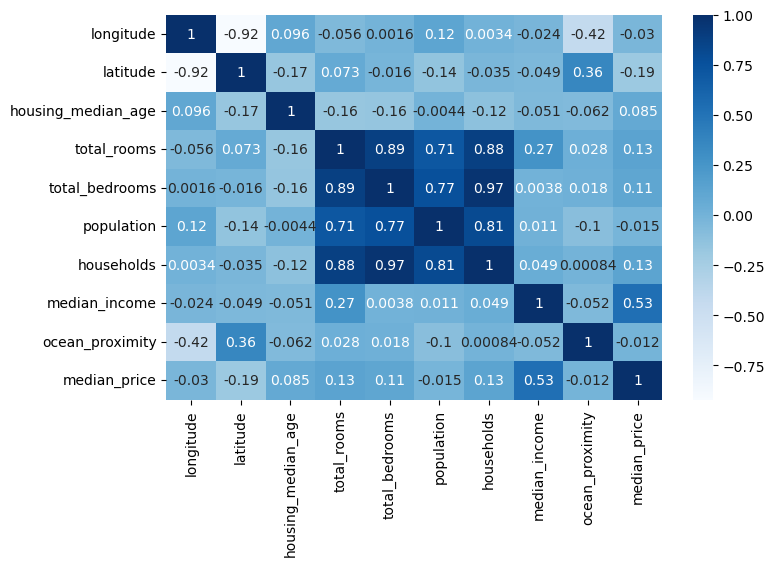

In [34]:
corr = finalData.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

## Training Model 

In [35]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error ,r2_score ,confusion_matrix

#### Spliting Data

In [36]:
F_Data = finalData.drop(['median_price'],axis=1)
T_Data = finalData['median_price']
scores = []

In [37]:
X_train, X_test, y_train, y_test = train_test_split(F_Data, T_Data, test_size=0.15, random_state=32, shuffle=True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (5128, 9)
X_test shape is  (905, 9)
y_train shape is  (5128,)
y_test shape is  (905,)


#### Training 

#### Gradient Boosting Regression

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

GBRegressor = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=400,random_state=10,loss='squared_error',verbose=1)

GBRegressor.fit(X_train, y_train)
trainScore = GBRegressor.score(X_train, y_train) 
testScore = GBRegressor.score(X_test, y_test)

print(f'Train Score -> {trainScore} \nTest Score -> {testScore}')

      Iter       Train Loss   Remaining Time 
         1  3351656455.0328           11.77s
         2  2989617044.3881           11.05s
         3  2689832105.9177           11.18s
         4  2445397466.1955           11.34s
         5  2236805966.7423           11.38s
         6  2059336337.1444           11.23s
         7  1916912584.9419           11.06s
         8  1782837981.0169           11.49s
         9  1671368436.6866           11.62s
        10  1582445704.9897           11.45s
        20  1119548961.5375           11.15s
        30   930962521.4023           10.66s
        40   824169973.2265           10.48s
        50   752795115.9185           10.10s
        60   687572463.8724            9.88s
        70   638362554.9939            9.55s
        80   599999165.7190            9.27s
        90   565969112.9654            9.02s
       100   535735366.0807            8.73s
       200   336708762.3858            5.86s
       300   236764443.8058            2.95s
       40

In [39]:
GB_pred = GBRegressor.predict(X_test)
GB_mse = mean_squared_error(y_test,GB_pred)
GB_r2 = r2_score(y_test, GB_pred)

print('Test score : ',round(testScore*100),'%')
print(f"R-squared (R2): {GB_r2}")
print(f'Mean Squared Error -> {np.round(GB_mse)}')

Test score :  78 %
R-squared (R2): 0.7814934482766388
Mean Squared Error -> 862241836.0


## Prediction And Evaluate Model 

`Categorical keys and values`
- <1H OCEAN -> 0
- INLAND -> 1
- NEAR OCEAN -> 2
- NEAR BAY -> 3
- ISLAND -> 4: 5}

In [42]:
input = [[-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,3.0]]
predTest = GBRegressor.predict(input)

predTest

F:\tools\anaconda\envs\AI-TF\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([67120.71858582])

        Actual      predicted
2499  102900.0   77693.028500
3864  183900.0  198181.075368
371   197100.0  202415.285961
788    55800.0   60245.539672
1503  147500.0  159130.576738
...        ...            ...
4144  140200.0  128573.639169
2524  115800.0  127493.394995
3044   93000.0   77364.226940
2914  146900.0  130537.446984
14    118800.0  165487.411833

[905 rows x 2 columns]


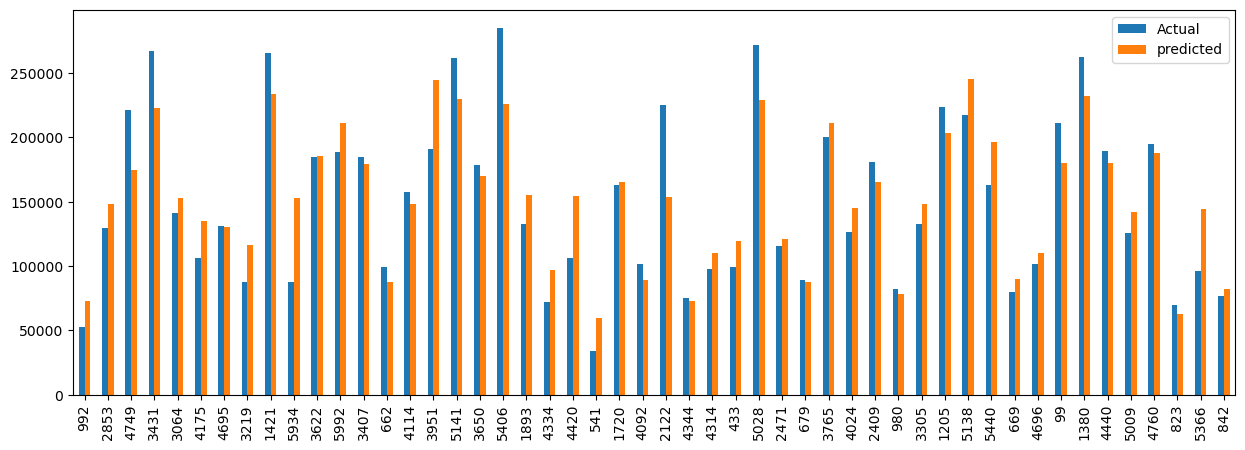

In [43]:
pred_accuracy = pd.DataFrame({'Actual' : y_test , 'predicted' : GB_pred})
print(pred_accuracy)

pred_accuracy = pred_accuracy.sample(50, replace = False)
pred_accuracy.plot(kind = 'bar' , figsize = (15,5))
plt.show()

## Saving Model

In [44]:
import pickle as pkl 

with open('California_House_Price.pkl' , 'wb') as file :
    pkl.dump(GBRegressor , file)

## Loading Model

In [46]:
with open('California_House_Price.pkl' , 'rb') as file : 
    loaded_model = pkl.load(file)

## Useing Model 

In [47]:
test = [[-118.70,34.28,27.0,727.0,136.0,467.0,144.0,3.7188,0.0]]
modelTest = loaded_model.predict(test)

modelTest

F:\tools\anaconda\envs\AI-TF\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([220322.79593972])